# Tutorial 8: Kinked Chromatin with Sterics

In `tutorial_7`, we saw how to simulate a kinked chromatin fiber. The tutorial neglected steric interactions between nucleosomes. In this demonstration, we will add the consideration of steric interactions in our predictions. Descriptions in this notebook will relate to the introduction of steric interactions in the model.

|

#### Important Consideration

As before, we do not model long-range interactions between bound reader proteins, and we treat the chromatin fiber as a homopolymer, as in [Wakim and Spakowitz _PNAS_ (2024)](https://www.pnas.org/doi/10.1073/pnas.2317911121).

|

#### Import Modules

Instead of the `DetailedChromatin` class, we will import the `DetailedChromatinWithSterics` class from the `polymers` module to account for steric interactions.

In [1]:
# Built-in modules
import os
import sys

# Third-party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom modules
from chromo.binders import get_by_name, make_binder_collection
from chromo.polymers import DetailedChromatinWithSterics    # This class captures DNA wrapping and nucleosome sterics
from chromo.fields import NullField
import chromo.mc as mc
import chromo.mc.mc_controller as ctrl
from chromo.util.reproducibility import get_unique_subfolder_name

|

#### Specify Binders

In [2]:
# Initialize a null binder to serve as a placeholder
null_binder = get_by_name("null_reader")

# Create a binder collection (required to run a simulation)
binder_collection = make_binder_collection([null_binder])

|

#### Initialize the Polymer

In this case, we will instantiate the `DetailedChromatinWithSterics` class, which has a method for evaluating steric interactions between nucleosomes.

In [3]:
# Specify the number of beads along the chromatin fiber
num_beads = 100

# Specify the spacing between adjacent beads
bead_spacing = np.ones(num_beads - 1) * 16.5

# Specify the geometry of DNA wrapping around the nucleosome
length_bp = 0.332
bp_wrap = 147.

# Specify the bending and twist persistence lengths
lp = 50
lt = 100

In [4]:
poly = DetailedChromatinWithSterics.straight_line_in_x(
    "Chr",
    bead_spacing,
    bp_wrap=bp_wrap,
    lp=lp,
    lt=lt
)

No states defined.
No chemical modifications defined.


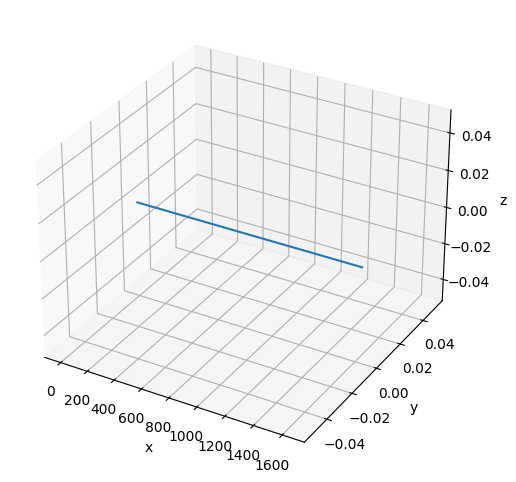

In [5]:
# Plot the initial configuration of the polymer
x = poly.r[:, 0]
y = poly.r[:, 1]
z = poly.r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

|

#### Instantiate the Null Field

In [6]:
# The field contains the polymer
field = NullField(polymers=[poly])

|

#### Specify the Simulation Parameters

In [7]:
amp_bead_bounds, amp_move_bounds = mc.get_amplitude_bounds(
    polymers = [poly]
)

In [8]:
out_dir = "output_demo"
latest_sim = get_unique_subfolder_name(f"{out_dir}/sim_")
moves_to_use = ctrl.all_moves_except_binding_state(
    log_dir=latest_sim,
    bead_amp_bounds=amp_bead_bounds.bounds,
    move_amp_bounds=amp_move_bounds.bounds,
    controller=ctrl.SimpleControl
)

In [9]:
# Specify the number of snapshots and the number of MC steps to attempt per snapshot
num_snapshots = 200
mc_steps_per_snapshot = 200  # Reduce the number of MC steps per snapshot to speed up the simulation
# TODO: If you want to run a more rigorous simulation, increase the number of MC steps per snapshot

|

#### Run the Simulation

In [ ]:
polymers = mc.polymer_in_field(
    polymers = [poly],
    binders = binder_collection,
    field = field,
    num_save_mc = mc_steps_per_snapshot,
    num_saves = num_snapshots,
    bead_amp_bounds = amp_bead_bounds,
    move_amp_bounds = amp_move_bounds,
    output_dir = out_dir,
    mc_move_controllers = moves_to_use
)

|

#### Plot the Resulting Configuration

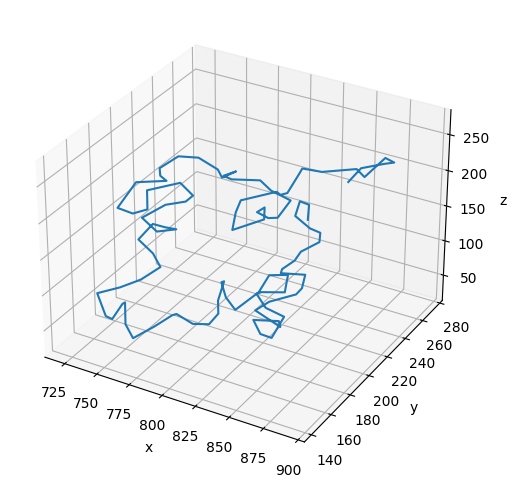

In [11]:
# Plot the final configuration of the polymer
x = polymers[0].r[:, 0]
y = polymers[0].r[:, 1]
z = polymers[0].r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()